coba menggunakan passive agressive classifier, data yang akan diprediksi dijadiksan satu dulu di awal untuk diolah bersama

In [1]:
import pandas as pd
from google.colab import files
import zipfile

In [2]:
!pip install -q kaggle
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! pip install --upgrade kaggle
! kaggle datasets download -d ilhamfp31/dataset-tripadvisor

Saving kaggle.json to kaggle.json
  0% 0.00/1.13M [00:00<?, ?B/s]
100% 1.13M/1.13M [00:00<00:00, 37.9MB/s]


In [3]:
zip_ref = zipfile.ZipFile('/content/dataset-tripadvisor.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [4]:
df = pd.read_csv('/content/files/train_set.csv')
test = pd.read_csv('/content/files/test_set.csv')
pd.set_option('max_colwidth',150)

In [5]:
df_full = pd.concat([df,test])
df_full = df_full.drop_duplicates(subset=['content'])

In [6]:
print(df_full.shape)
print(df_full['polarity'].value_counts())

(11696, 2)
positive    6091
negative    5605
Name: polarity, dtype: int64


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize, FreqDist,bigrams,trigrams

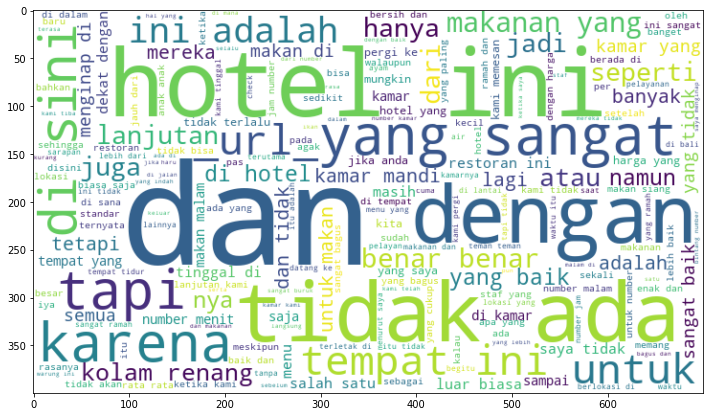

In [8]:
plt.figure(figsize=(12,10))
cloud = WordCloud(background_color='white',width=700,height=400,max_words=200,min_font_size=6).generate(' '.join(df_full['content']))
plt.imshow(cloud,interpolation='bilinear')

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stem = factory.create_stemmer()
stop = nltk.corpus.stopwords.words('indonesian')
files.upload()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 209 kB 13.4 MB/s 


Saving contoh_review.csv to contoh_review.csv
Saving stopwords.txt to stopwords.txt


{'contoh_review.csv': b'Tempatnya bersih nyaman Ac & shower berfungsi dengan baik Gak ada batasan jam Sayangnya agak jauh dari tempat jualan makanan  Overall recommended,\r\nResepsionis ramah dan membantu sekali Mohon maaf lupa ambil foto karena sibuk sama si kecil  Recommended place for stay dan lokasi strategis,\r\nNot recomended udah bayar mahal tapi AC gak dingin sama sekali! lalu di dalam kamar juga gaada sabun dan shamponya  plis perbaiki  saya sebagai guest merasa kecewa banget!!!,\r\nresepsioniya malas menjelaskan fasilitas hotel terhadap penyewa hotel lobby juga terasa panas entah gak ada AC atau memang AC dimatikan buat ruangan lobby,\r\nada kutu kasurnya saya sarankan jangan menginap disini  istri saya sampai bentol bentol  untung anak dan saya ga kena  karena saya tidur di kasur terpisah sedangkan istri dan anak tidur dalam 1 kasur  alhamdullilah anak ga kena ,\r\nSangat mengecewakan padahal nggk nginep cuma bawa 4 orang malah kena charge 200 rbu dan nggk ada pemberitahuan 

In [11]:
review = pd.read_csv('/content/contoh_review.csv',header=None)
review = review.dropna(axis=1,how='all')
review.columns=['text'] 
review

,text
0,Tempatnya bersih nyaman Ac & shower berfungsi dengan baik Gak ada batasan jam Sayangnya agak jauh dari tempat jualan makanan Overall recommended
1,Resepsionis ramah dan membantu sekali Mohon maaf lupa ambil foto karena sibuk sama si kecil Recommended place for stay dan lokasi strategis
2,Not recomended udah bayar mahal tapi AC gak dingin sama sekali! lalu di dalam kamar juga gaada sabun dan shamponya plis perbaiki saya sebagai gu...
3,resepsioniya malas menjelaskan fasilitas hotel terhadap penyewa hotel lobby juga terasa panas entah gak ada AC atau memang AC dimatikan buat ruang...
4,ada kutu kasurnya saya sarankan jangan menginap disini istri saya sampai bentol bentol untung anak dan saya ga kena karena saya tidur di kasur ...
5,Sangat mengecewakan padahal nggk nginep cuma bawa 4 orang malah kena charge 200 rbu dan nggk ada pemberitahuan dari awal
6,Kamar nyaman bersih air panas dan dingin berfungsi dengan normal di sebelahnya banyak orang jualan makanan sampai larut malam receptionistnya rama...
7,Harga murah Namun kebersihan didlm kamar perlu diperhatikan lagi Sprei yg sdh mulai kusam harusnya diganti Lain dr itu sdh ok lengkap ada ac tv...
8,resepsionisya serasa malas menjelaskan detail fasitas hotel ya ac yang tidak dingin tv juga no signal
9,tempat nya enak tenang tdk gaduh nyaman rasanya kaya saya ngekos disini bisa di ulangi untuk menginap disini


In [12]:
newstop = open('/content/stopwords.txt','r').read().split()
stop.extend(newstop)

In [13]:
import re
import string
def remove_symbol(content):
  return re.sub('<\S+>','',content,flags=re.DOTALL)
  return re.sub(r'[^A-Za-z0-9^]',' ',content)
def remove_punctuation(content):
  return re.sub('[%s]' % re.escape(string.punctuation),'',content)
def remove_stopwords(content):
  content = [word.lower() for word in content.lower().split() if word not in stop]
  return(' '.join(content))
def remove_words(content):
  content = [word.lower() for word in content.lower().split() if len(word) >= 3]
  return(' '.join(content))

In [14]:
def preprocessing(content):
  content = remove_symbol(content)
  content = remove_punctuation(content)
  content = remove_stopwords(content)
  content = remove_words(content)
  return content
df_full['clean'] = df_full['content'].apply(preprocessing)
review['text'] = review['text'].apply(preprocessing)

In [15]:
df_full_neg = df_full[(df_full.polarity=='negative')]
df_full_pos = df_full[(df_full.polarity=='positive')]

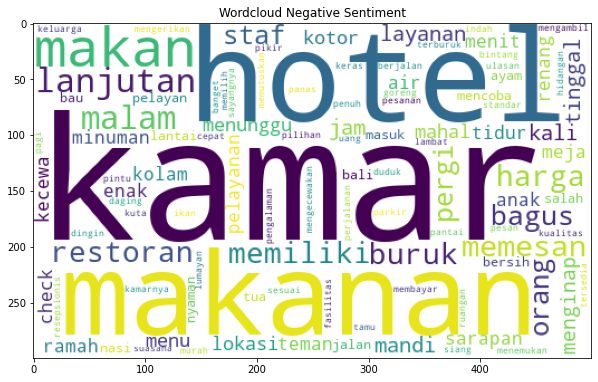

In [16]:
plt.figure(figsize=(10,8))
cloud = WordCloud(background_color='white',width=500,height=300,max_words=200,min_font_size=8,collocations=False).generate(' '.join(df_full_neg['clean']))
plt.title('Wordcloud Negative Sentiment')
plt.imshow(cloud)

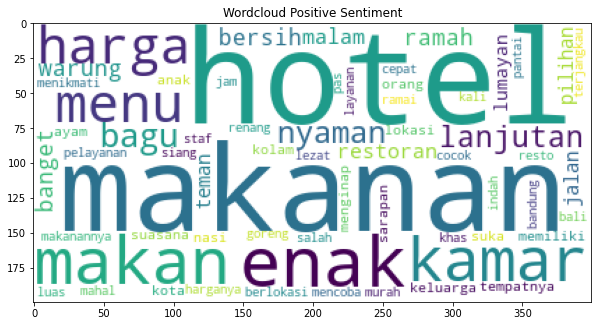

In [18]:
plt.figure(figsize=(10,8))
cloud = WordCloud(background_color='white',width=400,height=200,max_words=200,min_font_size=8,collocations=False).generate(' '.join(df_full_pos['clean']))
plt.title('Wordcloud Positive Sentiment')
plt.imshow(cloud)

In [19]:
tweet = df_full['clean'].values
label = df_full['polarity'].values
test = review['text'].values

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(tweet,label,test_size=0.2)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9356,)
(9356,)
(2340,)
(2340,)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tfidf = TfidfVectorizer(ngram_range=(1,3),max_df=0.85,min_df=0.0005)
tf_X = tfidf.fit_transform(X_train)
tf_test = tfidf.transform(X_test)
tf_pred = tfidf.transform(test)

In [23]:
print(tf_X.shape)
print(tf_test.shape)
print(tf_pred.shape)

(9356, 8255)
(2340, 8255)
(10, 8255)


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
cf = MultinomialNB()
cf.fit(tf_X,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred = cf.predict(tf_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.81      0.78      0.80      1123
    positive       0.81      0.83      0.82      1217

    accuracy                           0.81      2340
   macro avg       0.81      0.81      0.81      2340
weighted avg       0.81      0.81      0.81      2340



In [26]:
predictions = cf.predict(tf_pred)

In [27]:
df_pred = pd.DataFrame({'content':test,'sentiment':predictions})
df_pred.iloc[1:10]

,content,sentiment
1,resepsionis ramah membantu mohon maaf lupa ambil foto sibuk recommended place for stay lokasi strategis,positive
2,not recomended udah bayar mahal gak dingin kamar gaada sabun shamponya plis perbaiki guest kecewa banget,negative
3,resepsioniya malas fasilitas hotel penyewa hotel lobby panas gak dimatikan ruangan lobby,negative
4,kutu kasurnya sarankan menginap istri bentol bentol untung anak kena tidur kasur terpisah istri anak tidur kasur alhamdullilah anak kena,negative
5,mengecewakan nggk nginep bawa orang kena charge 200 rbu nggk pemberitahuan,negative
6,kamar nyaman bersih air panas dingin berfungsi normal sebelahnya orang jualan makanan larut malam receptionistnya ramah lobby lumayan luas ditamba...,positive
7,harga murah kebersihan didlm kamar diperhatikan sprei sdh kusam diganti sdh lengkap kulkas,negative
8,resepsionisya serasa malas detail fasitas hotel dingin signal,positive
9,enak tenang tdk gaduh nyaman kaya ngekos ulangi menginap,positive
